**Класи задач, що розв’язують НМ**

Основні класи задач, що вирішуються штучними НМ: класифікація, регресія

Більш детально для загального поняття НМ: апроксимація функцій, кластеризація, візуальне розпізнання об'єктів, обробка природньої мови, і т.д.


**Етапи побудови проекту з НМ**



1. Постановка задачі
2. Отримання даних
3. Початковий аналіз даних
4. Підготовка даних для більш чіткої категоризації, у форматі, прийнятному для імплементації нейронної мережі
5. Дослідження різних моделей та обрання найкращої
6. Точне налаштування моделі
7. Запуск системи, спостереження та супровід



**Функція завантаження навчаючої та тестової вибірки. Детально на прикладі**

Коли виконуємо навчання з вчителем, ми повинні мати навчаючу та тестову вибірку. Це правильні вхідні та вихідні дані: навчаюча вибірка використовується для навчання (fitting) моделі саме на її даних, а тестова вибірка використовується для оцінки якості. Це розділення довзоляє визначити, чи пристосована мережа до розпізнання невідомих даних, зокрема виявити overfitting.

Є безліч методів і функцій для завантаження вибірок, розглянемо приклад:

```
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
```
* `x_train` - масив навчаючих вхідних даних. у нашому випадку це масив масивів піксельних даних, тобто зображення одягу
* `y_train` - масив відповідних навчаючих вихідних даних, той самий розмір, скільки у `x_train`. У нашому випадку це значення 0..10, що вказує на клас, якому належить зображений одяг (краще виконати додаткову обробку і перетворити в one-hot encoding)
* `x_test` - масив тестових вхідних даних, аналогічно з x_train
* `y_test` - масив відповідних тестових вихідних даних, той самий розмір, скільки у `x_test`. Аналогічно з y_train.


**Дослідження даних. Основні функції. Розбиття даних на перевірочні та тестові.**

Для дослідження даних зручно викроистовувати Pandas DataFrame. Спочатку завантажуємо дані з .csv чи іншого формату, а потім:
*   `info` - виводить загальну інформацію про колонки, їх типи даних та кількіть не-null елементів
*  `head()` - виводить перші строки таблиці
* `describe()` - статистичні дані

Також завдяки інтеграції Seaborn з pyplot маємо можливість візуалізувати дані. Наприклад, `sns.pairplot` надає зручний спосіб виявити кореляції між парами змінних.

Дослідивши дані, можна автоматично розділити їх на тестові та навчаючі. Функції, такі як
`keras.preprocessing.image_dataset_from_directory` або `Model.fit` приймають параметр "validation_split", що дозволяють задати відсоткове співвідношення тестових даних із загальної вибірки.



**Оцінка якості роботи НМ**

Існують різні функції оцінки роботи НМ (середньоквадтратична помилка, `keras.CategoricalAccuracy`, `keras.BinaryAccuracy`). Всі вони певним чином визначають наближеність даних на виході мережі, що навчається, до справжніх тестових/валідаційних даних; або ж вірогідність надання правильної відповіді.

Якщо бачимо, що на навчальних даних "якість" близька до 100%, а на тестових/валідаційних даних вона значно менша, це свідчить про overfitting - тобто мережа пристосувалася саме до конкретної вибірки навчальних даних, а не виявила їх загальні характеристики.

В такому випадку можна збільшити набір тестових даних, або зменшити такі гіперпараметри, як кількість епох навчання, кількість шарів або нейронів НМ.

**Обрати текст (книгу) з ресурсу запропонованого на лекції. Підготувати його до
використання.**

Франкенштейн.

У текстовому редакторі виконана підготовка: видалені на початку та в кінці тексту технічний та легальний текст про Project Guthenberg.

In [ ]:
!wget 'https://raw.githubusercontent.com/gardenappl/uni/main/semesterm1/nn/lecture13-test/pg41445.txt'

--2022-11-29 13:29:30--  https://raw.githubusercontent.com/gardenappl/uni/main/semesterm1/nn/lecture13-test/pg41445.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417067 (407K) [text/plain]
Saving to: ‘pg41445.txt’

pg41445.txt         100%[===================>] 407.29K  --.-KB/s    in 0.02s   

2022-11-29 13:29:31 (16.0 MB/s) - ‘pg41445.txt’ saved [417067/417067]



In [ ]:
!head pg41445.txt

﻿PREFACE.


The event on which this fiction is founded has been supposed, by Dr.
Darwin, and some of the physiological writers of Germany, as not of
impossible occurrence. I shall not be supposed as according the remotest
degree of serious faith to such an imagination; yet, in assuming it as
the basis of a work of fancy, I have not considered myself as merely
weaving a series of supernatural terrors. The event on which the
interest of the story depends is exempt from the disadvantages of a mere


In [ ]:
!tail pg41445.txt

away; my ashes will be swept into the sea by the winds. My spirit will
sleep in peace; or if it thinks, it will not surely think thus.
Farewell.”

He sprung from the cabin-window, as he said this, upon the ice-raft
which lay close to the vessel. He was soon borne away by the waves, and
lost in darkness and distance.


THE END.

**Обрати 10 речень. Визначити емоційне забарвлення тексту та окремо речень. Зробити
висновки.**

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob("""The event on which this fiction is founded has been supposed, by Dr.
Darwin, and some of the physiological writers of Germany, as not of
impossible occurrence. I shall not be supposed as according the remotest
degree of serious faith to such an imagination; yet, in assuming it as
the basis of a work of fancy, I have not considered myself as merely
weaving a series of supernatural terrors. The event on which the
interest of the story depends is exempt from the disadvantages of a mere
tale of spectres or enchantment. It was recommended by the novelty of
the situations which it developes; and, however impossible as a physical
fact, affords a point of view to the imagination for the delineating of
human passions more comprehensive and commanding than any which the
ordinary relations of existing events can yield.

It is a subject also of additional interest to the author, that this
story was begun in the majestic region where the scene is principally
laid, and in society which cannot cease to be regretted. I passed the
summer of 1816 in the environs of Geneva. The season was cold and rainy,
and in the evenings we crowded around a blazing wood fire, and
occasionally amused ourselves with some German stories of ghosts, which
happened to fall into our hands. These tales excited in us a playful
desire of imitation. Two other friends (a tale from the pen of one of
whom would be far more acceptable to the public than any thing I can
ever hope to produce) and myself agreed to write each a story, founded
on some supernatural occurrence.

The weather, however, suddenly became serene; and my two friends left me
on a journey among the Alps, and lost, in the magnificent scenes which
they present, all memory of their ghostly visions. The following tale is
the only one which has been completed.""")

In [ ]:
blob.sentiment

Sentiment(polarity=-0.04047619047619048, subjectivity=0.4747448979591837)

Забарвлення негативне, суб'єктивне

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
for sentence in blob.sentences:
  print(sentence.sentiment)

Sentiment(polarity=-0.6666666666666666, subjectivity=1.0)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.5583333333333333)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.44857142857142857)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.19999999999999998, subjectivity=0.375)
Sentiment(polarity=0.12083333333333333, subjectivity=0.375)
Sentiment(polarity=0.12833333333333333, subjectivity=0.5016666666666667)
Sentiment(polarity=0.25, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.55)


Найпозитивніше речення - передостаннє (напевно через 'magnificent scenes')

**В текстовому описі вказати слова з помилками. Ввести в текст їх самостійно. Визначити
ймовірність можливого виправлення помилок в цих словах(реченнях).**

fitcion, Grmany, disadvantges, imposssible

In [ ]:
bad_blob = TextBlob("""The event on which this fitcion is founded has been supposed, by Dr.
Darwin, and some of the physiological writers of Grmany, as not of
impossible occurrence. I shall not be supposed as according the remotest
degree of serious faith to such an imagination; yet, in assuming it as
the basis of a work of fancy, I have not considered myself as merely
weaving a series of supernatural terrors. The event on which the
interest of the story depends is exempt from the disadvantges of a mere
tale of spectres or enchantment. It was recommended by the novelty of
the situations which it developes; and, however imposssible as a physical
fact, affords a point of view to the imagination for the delineating of
human passions more comprehensive and commanding than any which the
ordinary relations of existing events can yield.

It is a subject also of additional interest to the author, that this
story was begun in the majestic region where the scene is principally
laid, and in society which cannot cease to be regretted. I passed the
summer of 1816 in the environs of Geneva. The season was cold and rainy,
and in the evenings we crowded around a blazing wood fire, and
occasionally amused ourselves with some German stories of ghosts, which
happened to fall into our hands. These tales excited in us a playful
desire of imitation. Two other friends (a tale from the pen of one of
whom would be far more acceptable to the public than any thing I can
ever hope to produce) and myself agreed to write each a story, founded
on some supernatural occurrence.

The weather, however, suddenly became serene; and my two friends left me
on a journey among the Alps, and lost, in the magnificent scenes which
they present, all memory of their ghostly visions. The following tale is
the only one which has been completed.""")

In [ ]:
for word in bad_blob.words:
  check_results = word.spellcheck()
  if check_results[0][0] != word:
    print(word, check_results)

fitcion [('fiction', 1.0)]
Dr [('Or', 0.9176954732510288), ('Mr', 0.06172839506172839), ('R', 0.009087791495198902), ('Dr', 0.00823045267489712), ('Fr', 0.0008573388203017832), ('Er', 0.0008573388203017832), ('Gr', 0.0006858710562414266), ('Jr', 0.0003429355281207133), ('Tr', 0.00017146776406035664), ('Br', 0.00017146776406035664), ('Ar', 0.00017146776406035664)]
Grmany [('Many', 0.8982300884955752), ('Germany', 0.10176991150442478)]
disadvantges [('disadvantages', 1.0)]
spectres [('specters', 1.0)]
developes [('developed', 0.7727272727272727), ('develops', 0.21212121212121213), ('developer', 0.015151515151515152)]
imposssible [('impossible', 1.0)]
delineating [('deliberating', 1.0)]


Схоже, що слово "developes" помилкове (принаймні в сучасній англійській мові не вживається). Також бібліотека не розуміє справді існуючі слова 'Dr', 'delineating' та 'spectres' (останнє слово - британське). Інші слова визначено правильно. Ймовірність виправлення виведена зверху.

**Побудувати візуалізацію частот входження слів. Подати у вигляді словарної хмари. Форму
створити самостійно.**

Сортуємо слова за кількістю.

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stops = stopwords.words('english')

import requests
text = requests.get('https://raw.githubusercontent.com/gardenappl/uni/main/semesterm1/nn/lecture13-test/pg41445.txt').text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
blob = TextBlob(text)
items = blob.word_counts.items()

from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)


# Прибираємо стоп-слова.
top_words = [item for item in sorted_items if item[0] not in stops and item[0].isalnum()]

In [ ]:
print(top_words)

[('one', 196), ('could', 181), ('would', 176), ('yet', 160), ('father', 145), ('man', 131), ('upon', 123), ('every', 118), ('time', 111), ('might', 111), ('life', 110), ('may', 106), ('shall', 105), ('said', 104), ('first', 101), ('eyes', 99), ('saw', 94), ('towards', 91), ('elizabeth', 90), ('day', 89), ('mind', 87), ('night', 86), ('found', 84), ('even', 80), ('feelings', 80), ('death', 79), ('ever', 78), ('felt', 76), ('dear', 73), ('thought', 73), ('heart', 72), ('many', 69), ('friend', 69), ('also', 67), ('soon', 67), ('never', 66), ('must', 66), ('miserable', 66), ('made', 65), ('passed', 64), ('still', 63), ('heard', 63), ('us', 61), ('became', 61), ('human', 60), ('little', 60), ('although', 60), ('place', 60), ('sometimes', 59), ('indeed', 58), ('clerval', 58), ('like', 57), ('often', 56), ('justine', 56), ('appeared', 55), ('misery', 55), ('country', 54), ('several', 54), ('friends', 53), ('feel', 53), ('great', 52), ('see', 52), ('love', 51), ('know', 51), ('cottage', 51), (

In [ ]:
top20 = top_words[1:21]

import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])

In [ ]:
df

,word,count
0,could,181
1,would,176
2,yet,160
3,father,145
4,man,131
5,upon,123
6,every,118
7,time,111
8,might,111
9,life,110


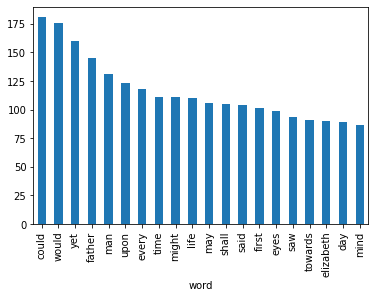

In [ ]:
axes = df.plot.bar(x='word', y='count', legend=False)

In [ ]:
import imageio
mask_image = imageio.imread('https://github.com/gardenappl/uni/raw/main/semesterm1/nn/lecture13-test/frank.jpg')

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

In [ ]:
wordcloud.generate(text).to_file('frankenstein-face.png')

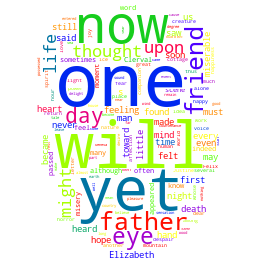

In [ ]:
from IPython.display import Image
Image('frankenstein-face.png', width=500)